In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.util.systems import system_from_str
from dsn.train_dsn import train_dsn
import seaborn as sns
import pandas as pd
import warnings
import scipy
warnings.filterwarnings("ignore")

In [6]:
system_D = 2;
system_str = 'linear_%dD' % system_D;

behavior_str = 'oscillation';

system_class = system_from_str(system_str);
system = system_class(behavior_str);
print(system.name)

all_nlayers = [10];
c_inits = [-5];
sigmas = [1];
random_seeds = [1,2,3,4,5];

nlayers = 10;
c_init = -5;
sigma_init = 1.0;

basedir = '/Users/sbittner/Documents/dsn/dsn/results/';
dirstr = 'linear_2D';

linear_2D


In [7]:
k_max = 25;
num_rs = 5;
sigma = 1.0;

mu_len = 4;
p_values = np.zeros((num_rs, k_max, mu_len));
for rs in range(1, 1+num_rs):

    savedir = basedir + dirstr + '/linear_2D_D=4_flow=M_%dP_sigma=%.2f_lr_order=-3_c=%d_rs=%d/' \
                                            % (nlayers, sigma, c_init, rs);
    fname = savedir + 'results.npz';
    npzfile = np.load(fname);
    title ='sigma=%.2f_rs=%d' % (sigma, rs)
    mu = npzfile['mu']

    for k in range(k_max):
        T_phis = npzfile['T_phis'][k+1];

        for i in range(mu_len):
            t, p = scipy.stats.ttest_1samp(T_phis[:100,i], mu[i]);
            p_values[rs-1,k,i] = p;

            

In [8]:
alpha = 0.05;
AL_final_its = [];
for i in range(num_rs):
    print('i=%d' % i);
    for j in range(k_max):
        con_sat = np.prod(p_values[i,j,:] > alpha);
        if (con_sat==1):
            AL_final_its.append(j);
            break;
        if (j==(k_max-1)):
            AL_final_its.append(k_max-1)
print(AL_final_its);


i=0
i=1
i=2
i=3
i=4
[7, 3, 3, 9, 4]


AL it 8


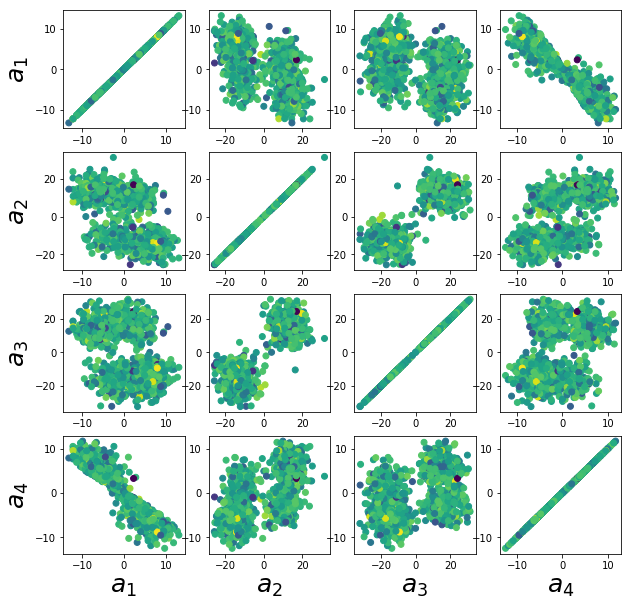

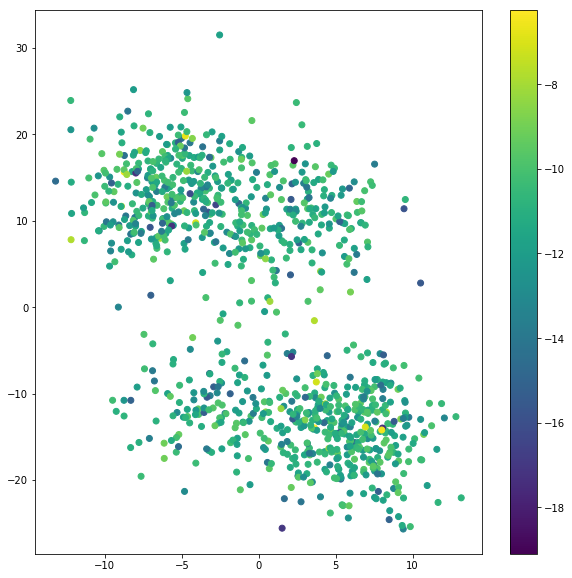

AL it 4


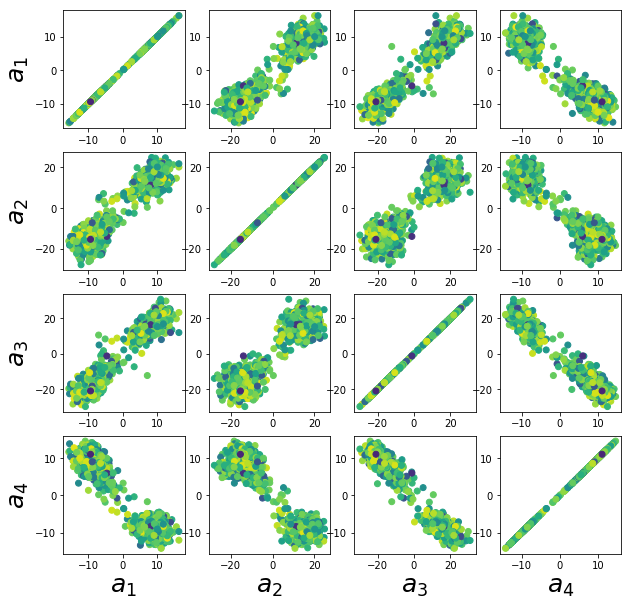

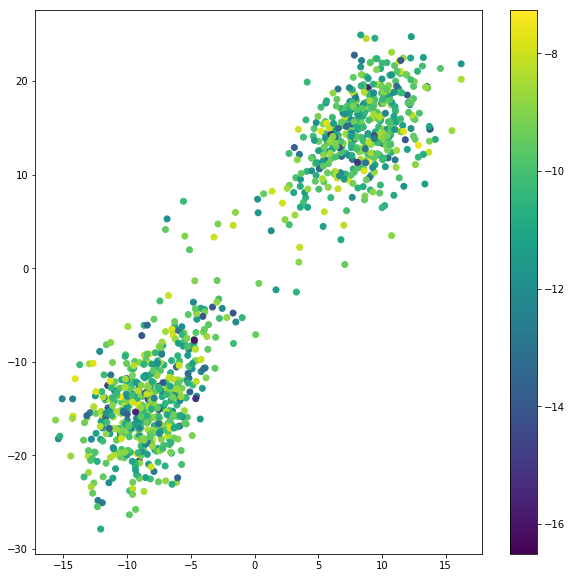

AL it 4


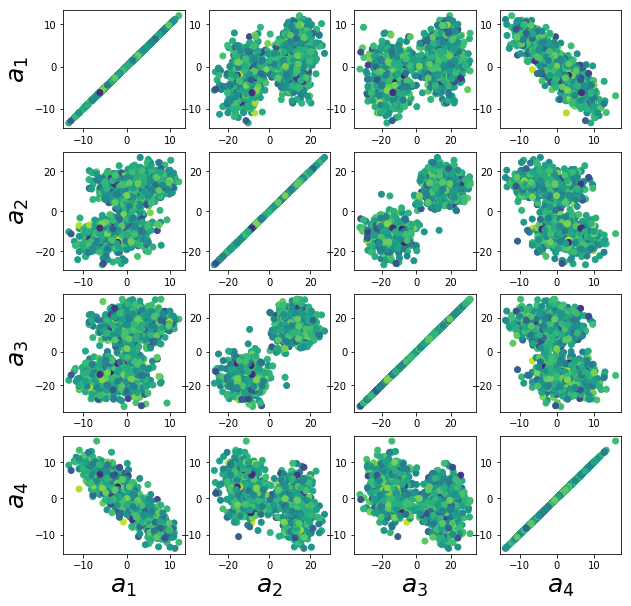

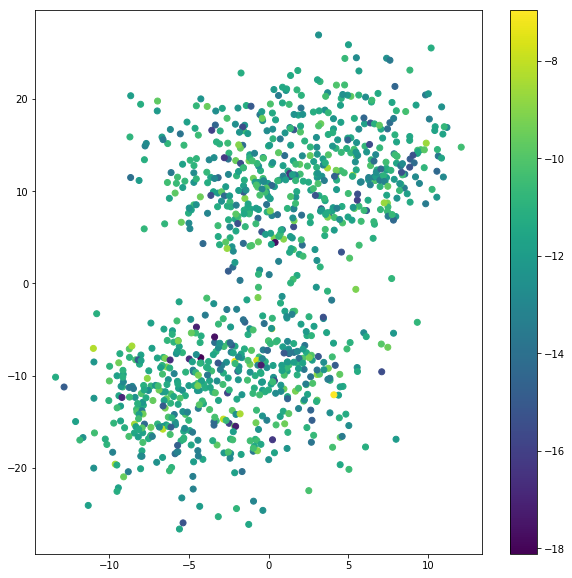

AL it 10


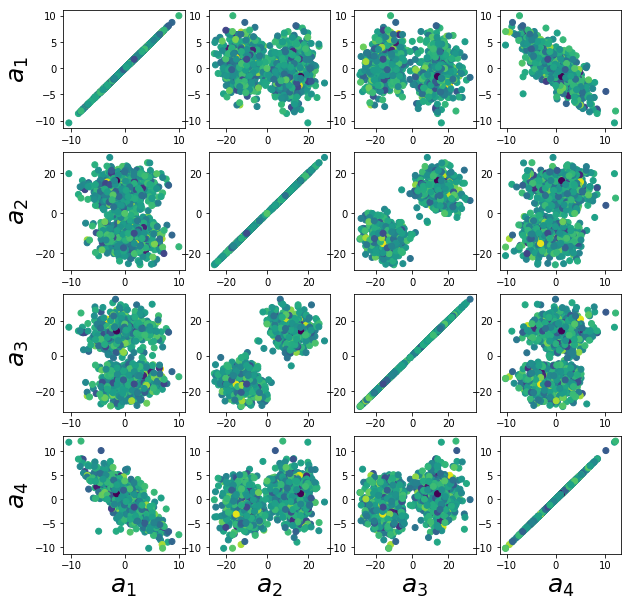

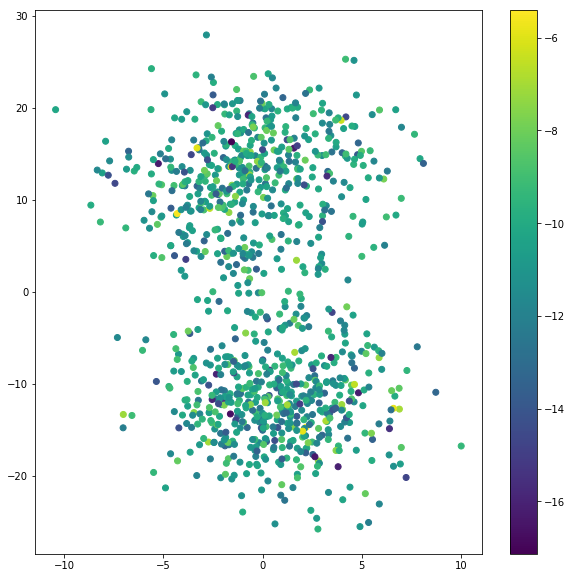

AL it 5


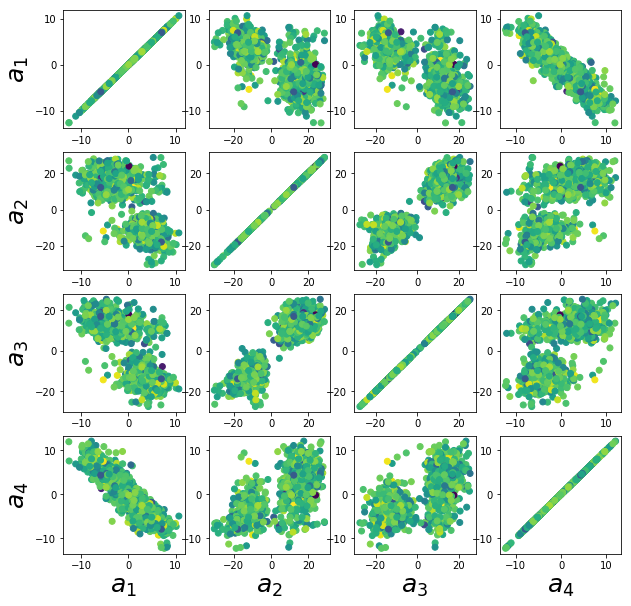

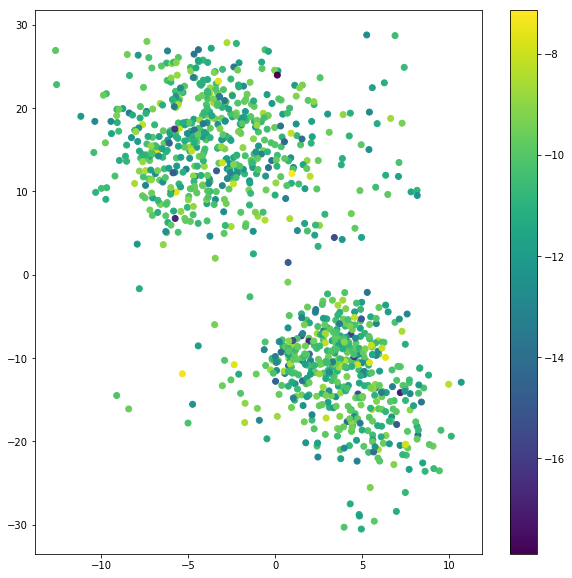

In [16]:
nlayers = 10;
sigma = 1.0;
c_init = -5;
k_max = 25;
rs = 3;


for rs in range(1,6):
    k = AL_final_its[rs-1] + 1;
    print('AL it %d' % k);
    fontsize = 25;
    savedir = basedir + dirstr + '/linear_2D_D=4_flow=M_%dP_sigma=%.2f_lr_order=-3_c=%d_rs=%d/' \
                            % (nlayers, sigma, c_init, rs);
    fname = savedir + 'results.npz';
    npzfile = np.load(fname);

    T_phis = npzfile['T_phis'];
    phis = npzfile['phis'];
    log_q_phis = npzfile['log_q_phis'];
    
    mean_T_phis = npzfile['mean_T_phis'];
    check_rate = npzfile['check_rate'];
    iterations = np.arange(0, mean_T_phis.shape[0], check_rate);
    
    figsize = (10, 10);
    plt.figure(figsize=figsize);
    for i in range(system.D):
        for j in range(system.D):
            ind = system.D*i + j + 1;
            plt.subplot(system.D, system.D, ind);
            plt.scatter(phis[k,:,j], phis[k, :, i], c=log_q_phis[k]);
            if (i==3):
                plt.xlabel(r'$a_%d$' % (j+1), fontsize=fontsize);
            if (j==0):
                plt.ylabel(r'$a_%d$' % (i+1), fontsize=fontsize);
    plt.show();
    
    figsize = (10, 10);
    plt.figure(figsize=figsize);
    plt.scatter(phis[k,:,0], phis[k, :, 1], c=log_q_phis[k]);
    plt.colorbar();
    plt.show();
